# Capstone Project - The Optimal Locations for Indian Restaurent

## Applied Data Science Capstone by IBM/Coursera



## 1. Importing Libraries

In [81]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

import pandas.io.json
import requests
import json

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim
from  geopy import distance

import geocoder
import folium

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries Imported')

Libraries Imported



## 2. Scrapping Data from Wikipedia Paga
   We will work in Borough of London, UK, we will scrap the data from [List of London Borough](https://en.wikipedia.org/wiki/List_of_London_boroughs). Page contens two table 'List of boroughs and local authorities' and
   'City of London'

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs',header=0)[0]

In [3]:
df

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [4]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs',header=0)[1]

In [5]:
df = df.append(df2, ignore_index=True)

In [7]:
df

,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status
0,13.93,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN
1,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
2,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
3,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
4,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN
5,8.40,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,"Camden Town Hall, Judd Street",NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN
6,33.41,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,"Bernard Weatherill House, Mint Walk",NaN,Croydon London Borough Council,19.0,NaN,Labour,372752.0,NaN,NaN
7,21.44,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,"Perceval House, 14-16 Uxbridge Road",NaN,Ealing London Borough Council,13.0,NaN,Labour,342494.0,NaN,NaN
8,31.74,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,"Civic Centre, Silver Street",NaN,Enfield London Borough Council,30.0,NaN,Labour,320524.0,NaN,NaN
9,18.28,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,"Woolwich Town Hall, Wellington Street",[note 3],Greenwich London Borough Council,22.0,NaN,Labour,264008.0,NaN,Royal


In [8]:
df['Population (2013 est)[1]'][32] = df['Population(2011 est)'][32]

In [9]:
df

,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status
0,13.93,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN
1,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
2,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
3,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
4,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN
5,8.40,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,"Camden Town Hall, Judd Street",NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN
6,33.41,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,"Bernard Weatherill House, Mint Walk",NaN,Croydon London Borough Council,19.0,NaN,Labour,372752.0,NaN,NaN
7,21.44,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,"Perceval House, 14-16 Uxbridge Road",NaN,Ealing London Borough Council,13.0,NaN,Labour,342494.0,NaN,NaN
8,31.74,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,"Civic Centre, Silver Street",NaN,Enfield London Borough Council,30.0,NaN,Labour,320524.0,NaN,NaN
9,18.28,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,"Woolwich Town Hall, Wellington Street",[note 3],Greenwich London Borough Council,22.0,NaN,Labour,264008.0,NaN,Royal


## 3 Plot the Borough on Map

In [10]:
# define a function to get coordinates
def get_latlng1(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London,UK '.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [44]:
loaded = False
try:
    London_df = pd.read_csv('London_df.csv')
    loaded = True
except:
    pass
    

In [12]:
if not loaded:  
    coords_london = [ get_latlng1(neighborhood) for neighborhood in df["Borough"].tolist() ]
    df['LatLng'] = coords_london
    df['Lat'] = df['LatLng'].apply(lambda x:x[0])
    df['Lng'] = df['LatLng'].apply(lambda x:x[1])
    London_df = df[['Borough','Lat','Lng','Area (sq mi)','Population (2013 est)[1]']]
    London_df.columns = ['Borough','Lat','Lng','Area','Population']
    London_df.Borough = London_df['Borough'].apply(lambda x:x.split('[')[0])
    London_df.to_csv(r'C:\Users\Shrirang\Desktop\Python Practice\Online Courses\IMB Data Science Cousre\Capstone_Project\Coursera_Capstone\Capstone_project\London_df.csv',index= False)

In [45]:
London_df

,Borough,Lat,Lng,Area,Population
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0
1,Barnet,51.527095,-0.066826,33.49,369088.0
2,Bexley,51.452078,0.069931,23.38,236687.0
3,Brent,51.609783,-0.194672,16.70,317264.0
4,Bromley,51.601511,-0.066365,57.97,317899.0
5,Camden,51.532360,-0.127960,8.40,229719.0
6,Croydon,51.593480,-0.083420,33.41,372752.0
7,Ealing,51.514060,-0.300730,21.44,342494.0
8,Enfield,51.540024,-0.077502,31.74,320524.0
9,Greenwich,51.484540,0.002750,18.28,264008.0


In [14]:
#first we need to get the co-ordinated of London,UK
g = geocoder.arcgis( 'London, UK ')
coordinated_centerlondon = g.latlng

In [15]:
coordinated_centerlondon

[51.50642000000005, -0.1272099999999341]

In [16]:
#Create map of London and superinpose the Neighborhood on it
map_la = folium.Map(location = coordinated_centerlondon, zoom_start = 10)
folium.Marker(coordinated_centerlondon, popup='London_center').add_to(map_la)
for lat, lng in zip(London_df['Lat'], London_df['Lng']):
    #folium.CircleMarker([lat, lng], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_la)
    folium.Circle([lat,lng], radius=30,color ="blue").add_to(map_la)
map_la

## Data from Foursquere API

In [17]:
#foruesqure credentials
client_id = 'xxxx'
client_secret = 'xxx'
version = '20200724'

In [18]:
# this id's are aquired from Foursqure
food_category = '4d4b7105d754a06374d81259'
indian_Restaurant =     ['4bf58dd8d48988d10f941735','54135bf5e4b08f3d2429dfe5','54135bf5e4b08f3d2429dff3',
                         '54135bf5e4b08f3d2429dff5','54135bf5e4b08f3d2429dfe2','54135bf5e4b08f3d2429dff2',
                         '54135bf5e4b08f3d2429dfe1','54135bf5e4b08f3d2429dfe3','54135bf5e4b08f3d2429dfe8',
                         '54135bf5e4b08f3d2429dfe9','54135bf5e4b08f3d2429dfe6','54135bf5e4b08f3d2429dfdf',
                         '54135bf5e4b08f3d2429dfe4','54135bf5e4b08f3d2429dfe7','54135bf5e4b08f3d2429dfea',
                         '54135bf5e4b08f3d2429dfeb','54135bf5e4b08f3d2429dfed','54135bf5e4b08f3d2429dfee',
                         '54135bf5e4b08f3d2429dff4','54135bf5e4b08f3d2429dfe0','54135bf5e4b08f3d2429dfdd',
                         '54135bf5e4b08f3d2429dff6','54135bf5e4b08f3d2429dfef','54135bf5e4b08f3d2429dff0',
                         '54135bf5e4b08f3d2429dff1','54135bf5e4b08f3d2429dfde','54135bf5e4b08f3d2429dfec']

In [19]:
radius = 2000
limit = 200



Let's get the number of Indian restaurants around the Neighbourhood

In [20]:
csv = False
try:
    venues_df = pd.read_csv('venues_df.csv')
    csv = True
except:
    pass

In [21]:
if not csv:
    venues = []
    for lat, lng, borough in zip(London_df['Lat'], London_df['Lng'],London_df['Borough']):
        for i in indian_Restaurant:
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                        client_id, client_secret, version, lat,lng ,i, radius, limit)
            result = requests.get(url).json()

            for venue in result['response']['groups'][0]['items']:
                venues.append((borough,lat,lng, area, population,
                                      venue['venue']['name'],
                                      venue['venue']['categories'][0]['name'],
                                      venue['venue']['location']['lat'],
                                      venue['venue']['location']['lng'],
                                      venue['venue']['location']['distance']))
    venues_df = pd.DataFrame(venues,columns=['Borough','lat','lng','name','categori','venue_lat','vanue_lng','distance'])
    venues_df.to_csv(r'C:\Users\Shrirang\Desktop\Python Practice\Online Courses\IMB Data Science Cousre\Capstone_Project\Coursera_Capstone\Capstone_project\venues_df.csv', index=False)
    

In [22]:
venues_df = venues_df.merge(London_df[['Borough','Area','Population']],on = 'Borough')

In [40]:
venues_df

,Borough,lat,lang,name,categori,venue_lat,vanue_lng,distance,Area,Population
0,Barking and Dagenham,51.574790,0.163640,Asia Spice,Indian Restaurant,51.574758,0.186470,1579,13.93,194352.0
1,Barking and Dagenham,51.574790,0.163640,Bekash,Indian Restaurant,51.575035,0.187043,1619,13.93,194352.0
2,Barking and Dagenham,51.574790,0.163640,Cosmo,Restaurant,51.575445,0.180456,1165,13.93,194352.0
3,Barking and Dagenham,51.574790,0.163640,Tandoori Hut,Indian Restaurant,51.581113,0.138522,1874,13.93,194352.0
4,Barnet,51.627300,-0.253760,Day of the Raj,Indian Restaurant,51.616012,-0.244872,1398,33.49,369088.0
5,Barnet,51.627300,-0.253760,Spice Kings,Indian Restaurant,51.626428,-0.269594,1098,33.49,369088.0
6,Barnet,51.627300,-0.253760,Mill Hill Tandoori,Indian Restaurant,51.614058,-0.248797,1513,33.49,369088.0
7,Barnet,51.627300,-0.253760,India Garden,Indian Restaurant,51.616804,-0.241517,1442,33.49,369088.0
8,Bexley,51.452078,0.069931,Yak & Yeti,Indian Restaurant,51.450717,0.052566,1214,23.38,236687.0
9,Bexley,51.452078,0.069931,Le Spice,Indian Restaurant,51.439109,0.070403,1444,23.38,236687.0


In [69]:
# get the distance of the Borough from city center by lat and longitude

In [72]:
coordinated_centerlondon

[51.50642000000005, -0.1272099999999341]

In [92]:
London_df['Dist_from_center'] = np.NaN
for index in range(London_df.shape[0]):
    coords_1 = coordinated_centerlondon
    coords_2 = (London_df['Lat'].iloc[index],London_df['Lng'].iloc[index])
    London_df['Dist_from_center'].iloc[index] = distance.distance(coords_1, coords_2).km

In [93]:
London_df

,Borough,Lat,Lng,Area,Population,Indian_rest_count,rest_per_area,rest_per_people,Dist_from_center
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,4,3.482500,48588.000000,22.265301
1,Barnet,51.527095,-0.066826,33.49,369088.0,4,8.372500,92272.000000,4.781269
2,Bexley,51.452078,0.069931,23.38,236687.0,5,4.676000,47337.400000,14.970919
3,Brent,51.609783,-0.194672,16.70,317264.0,6,2.783333,52877.333333,12.415363
4,Bromley,51.601511,-0.066365,57.97,317899.0,6,9.661667,52983.166667,11.390290
5,Camden,51.532360,-0.127960,8.40,229719.0,76,0.110526,3022.618421,2.886507
6,Croydon,51.593480,-0.083420,33.41,372752.0,109,0.306514,3419.743119,10.151281
7,Ealing,51.514060,-0.300730,21.44,342494.0,9,2.382222,38054.888889,12.076566
8,Enfield,51.540024,-0.077502,31.74,320524.0,15,2.116000,21368.266667,5.087251
9,Greenwich,51.484540,0.002750,18.28,264008.0,17,1.075294,15529.882353,9.347909


In [ ]:
distance.distance()

In [46]:
#lets get the number of the restaurants per sq.mil of area, 
London_df['Indian_rest_count'] = venues_df.groupby('Borough').count().reset_index()['lat']

London_df['rest_per_area'] = London_df['Area']/London_df['Indian_rest_count']
London_df['rest_per_people'] = London_df['Population']/London_df['Indian_rest_count']

In [49]:
London_df

,Borough,Lat,Lng,Area,Population,Indian_rest_count,rest_per_area,rest_per_people
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,4,3.482500,48588.000000
1,Barnet,51.527095,-0.066826,33.49,369088.0,4,8.372500,92272.000000
2,Bexley,51.452078,0.069931,23.38,236687.0,5,4.676000,47337.400000
3,Brent,51.609783,-0.194672,16.70,317264.0,6,2.783333,52877.333333
4,Bromley,51.601511,-0.066365,57.97,317899.0,6,9.661667,52983.166667
5,Camden,51.532360,-0.127960,8.40,229719.0,76,0.110526,3022.618421
6,Croydon,51.593480,-0.083420,33.41,372752.0,109,0.306514,3419.743119
7,Ealing,51.514060,-0.300730,21.44,342494.0,9,2.382222,38054.888889
8,Enfield,51.540024,-0.077502,31.74,320524.0,15,2.116000,21368.266667
9,Greenwich,51.484540,0.002750,18.28,264008.0,17,1.075294,15529.882353


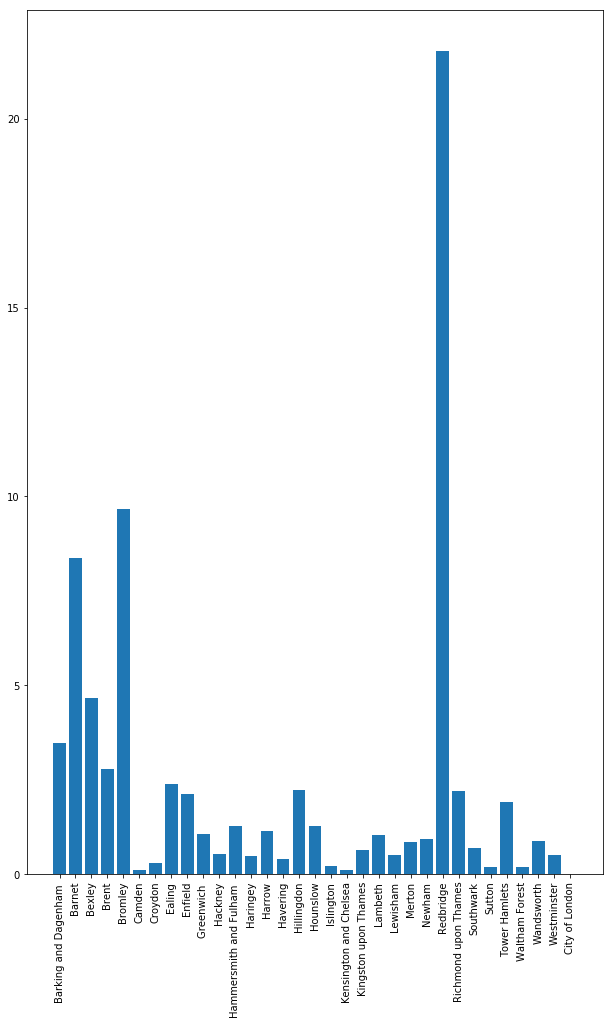

In [70]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_axes([0,0,1,1])
ax.bar(London_df['Borough'],London_df['rest_per_area'])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


Now get the top 100 venues from neighborhood


In [24]:
top_100 = False
try:
    top_100_df = pd.read_csv("top_100.csv")
    top_100 = True
except:
    top_100 = True
    

In [25]:
if not top_100:
    top_100 = []
    for borough,lat, lng in zip(London_df['Borough'],London_df['Lat'], London_df['Lng']):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            client_id,
            client_secret,
            version,
            lat,
            lng,
            2000, 
            100)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for top in results:
            top_100.append((
                borough,
                lat, 
                lng, 
                top['venue']['name'], 
                top['venue']['location']['lat'], 
                top['venue']['location']['lng'],  
                top['venue']['categories'][0]['name']))
    top_100_df = pd.DataFrame(data = top_100, columns=['Borough','Lat','Lng','name','lat','lng','category'])
    top_100_df.to_csv(r'C:\Users\Shrirang\Desktop\Python Practice\Online Courses\IMB Data Science Cousre\Capstone_Project\Coursera_Capstone\Capstone_project\top_100.csv', index=False)

In [27]:
top_100_df.head(10)

,Borough,Lat,Lng,name,lat,lng,category
0,Barking and Dagenham,51.57478,0.17441,Costa Coffee,51.576890,0.179497,Coffee Shop
1,Barking and Dagenham,51.57478,0.17441,The Range,51.575550,0.180254,Furniture / Home Store
2,Barking and Dagenham,51.57478,0.17441,Ciao Bella,51.576103,0.182819,Italian Restaurant
3,Barking and Dagenham,51.57478,0.17441,Debenhams,51.579097,0.182720,Department Store
4,Barking and Dagenham,51.57478,0.17441,Premiere Cinema,51.579411,0.185657,Multiplex
5,Barking and Dagenham,51.57478,0.17441,Costa Coffee,51.576481,0.182448,Coffee Shop
6,Barking and Dagenham,51.57478,0.17441,Pets at Home,51.569605,0.183878,Pet Store
7,Barking and Dagenham,51.57478,0.17441,Marks & Spencer,51.577495,0.182154,Department Store
8,Barking and Dagenham,51.57478,0.17441,TK Maxx,51.577051,0.179712,Clothing Store
9,Barking and Dagenham,51.57478,0.17441,Lidl,51.573889,0.183042,Supermarket


In [28]:
top_100_df[['Borough','category']].groupby('Borough').count()

,category
Borough,
Barking and Dagenham,86
Barnet,100
Bexley,36
Brent,93
Bromley,95
Camden,100
City of London,100
Croydon,100
Ealing,100


There are 282 unique categories present

In [29]:
print('There are {} unique categories present in Borough'.format(len(top_100_df['category'].unique())))

There are 282 unique categories present in Borough


In [30]:
top_100_dummy = pd.get_dummies(top_100_df[['category']],prefix="", prefix_sep="")

In [32]:
top_100_dummy.head(15)

,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,

In [33]:
top_100_dummy.shape


(3128, 282)

In [99]:
'''# add borough column to top_100_dummy
top_100_dummy['Borough'] = top_100_df['Borough']

#rearrange the column
column = top_100_dummy.columns.tolist()

#rearrange the column
column = top_100_dummy.columns.tolist()

top_100_dummy = top_100_dummy[column[-1:] + column[:-1]]'''

"# add borough column to top_100_dummy\ntop_100_dummy['Borough'] = top_100_df['Borough']\n\n#rearrange the column\ncolumn = top_100_dummy.columns.tolist()\n\n#rearrange the column\ncolumn = top_100_dummy.columns.tolist()\n\ntop_100_dummy = top_100_dummy[column[-1:] + column[:-1]]"

In [94]:
top_100_dummy.shape

(3128, 283)

In [35]:
top_100_dummy.head(15)

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wi

In [36]:
top_100_dummy_grouped = top_100_dummy.groupby('Borough').mean().reset_index()

In [37]:
top_100_dummy_grouped

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wi

In [98]:
top_100_dummy_grouped.shape

(33, 283)

Get the top 10 commom place from each of the borough 

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Borough']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = top_100_dummy_grouped ['Borough']


for ind in np.arange(top_100_dummy_grouped.shape[0]):
    row_categories = top_100_dummy_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    borough_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]





In [39]:
borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Coffee Shop,Fast Food Restaurant,Clothing Store,Grocery Store,Shopping Mall,Park,Café,Supermarket,Pub,Furniture / Home Store
1,Barnet,Coffee Shop,Restaurant,Pub,Café,Bookstore,Italian Restaurant,Hotel,Pizza Place,Cocktail Bar,Beer Bar
2,Bexley,Grocery Store,Pub,Mediterranean Restaurant,Park,Garden,Bakery,Bar,Clothing Store,Garden Center,Movie Theater
3,Brent,Coffee Shop,Supermarket,Turkish Restaurant,Café,Gym / Fitness Center,Grocery Store,Park,Japanese Restaurant,Bakery,Pharmacy
4,Bromley,Pub,Coffee Shop,Park,Grocery Store,Fast Food Restaurant,Café,Supermarket,Turkish Restaurant,Brewery,Bar
5,Camden,Coffee Shop,Pizza Place,Café,Beer Bar,Wine Bar,Breakfast Spot,Bookstore,Bakery,Middle Eastern Restaurant,Burger Joint
6,City of London,Coffee Shop,Hotel,Gym / Fitness Center,Cocktail Bar,Falafel Restaurant,History Museum,Italian Restaurant,Steakhouse,Street Food Gathering,Pizza Place
7,Croydon,Turkish Restaurant,Pub,Café,Mediterranean Restaurant,Park,Coffee Shop,Supermarket,Lounge,Gym / Fitness Center,Hookah Bar
8,Ealing,Coffee Shop,Pub,Park,Italian Restaurant,Hotel,Café,Burger Joint,Pizza Place,Gym / Fitness Center,Grocery Store
9,Enfield,Pub,Bakery,Coffee Shop,Pizza Place,Café,Park,Cocktail Bar,Restaurant,Yoga Studio,Modern European Restaurant
